In [16]:
#mel frequency cepstrum coefficients aka mfcc
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np


In [17]:
audio_file="D:\Music samples\iveen-harps-sample-pack\SD_IVEEN_Harps_SamplePack\Warped Harps\SD_IVEENHarps_warped_loop_80sFantasyVHS_112_C.wav"

In [18]:
ipd.Audio(audio_file)

In [19]:
signal,sr = librosa.load(audio_file)

In [20]:
signal.shape #no of samples

(378001,)

In [21]:
#Extracting mfccs
mfccs = librosa.feature.mfcc(signal,n_mfcc=13,sr=sr) #samples,no of coefficients and the sample rate


C:\Users\joshi\AppData\Local\Temp\ipykernel_19380\3397269590.py:2: FutureWarning: Pass y=[-4.7198080e-07 -1.9842898e-06  1.0715303e-05 ... -1.2884074e-04
 -4.7798260e-04 -2.2436681e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal,n_mfcc=13,sr=sr) #samples,no of coefficients and the sample rate


In [22]:
mfccs.shape

(13, 739)

<function matplotlib.pyplot.show(close=None, block=None)>

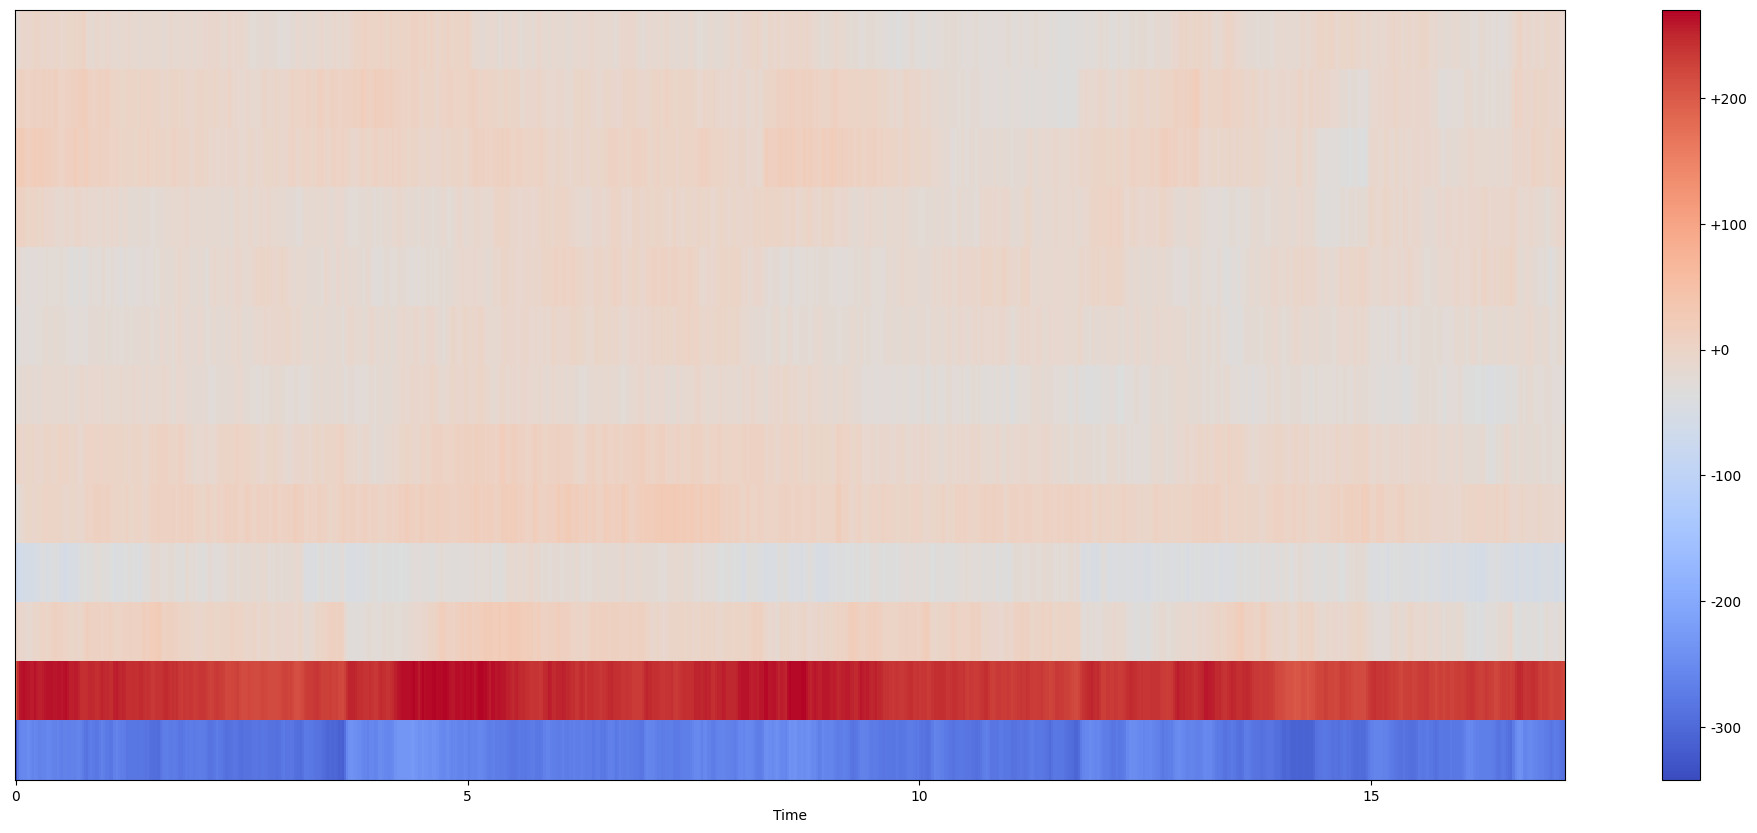

In [23]:
#Visualise mfccs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show

In [24]:
#taking derivatives of mfccs to see how they vary overtime, it makes the model mmore accurate
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs,order=2) #second derivative 


In [25]:
delta2_mfccs.shape

(13, 739)

In [30]:
delta_mfccs.shape

(13, 739)

In [31]:
mfccs.shape

(13, 739)

mfccs.shape

<function matplotlib.pyplot.show(close=None, block=None)>

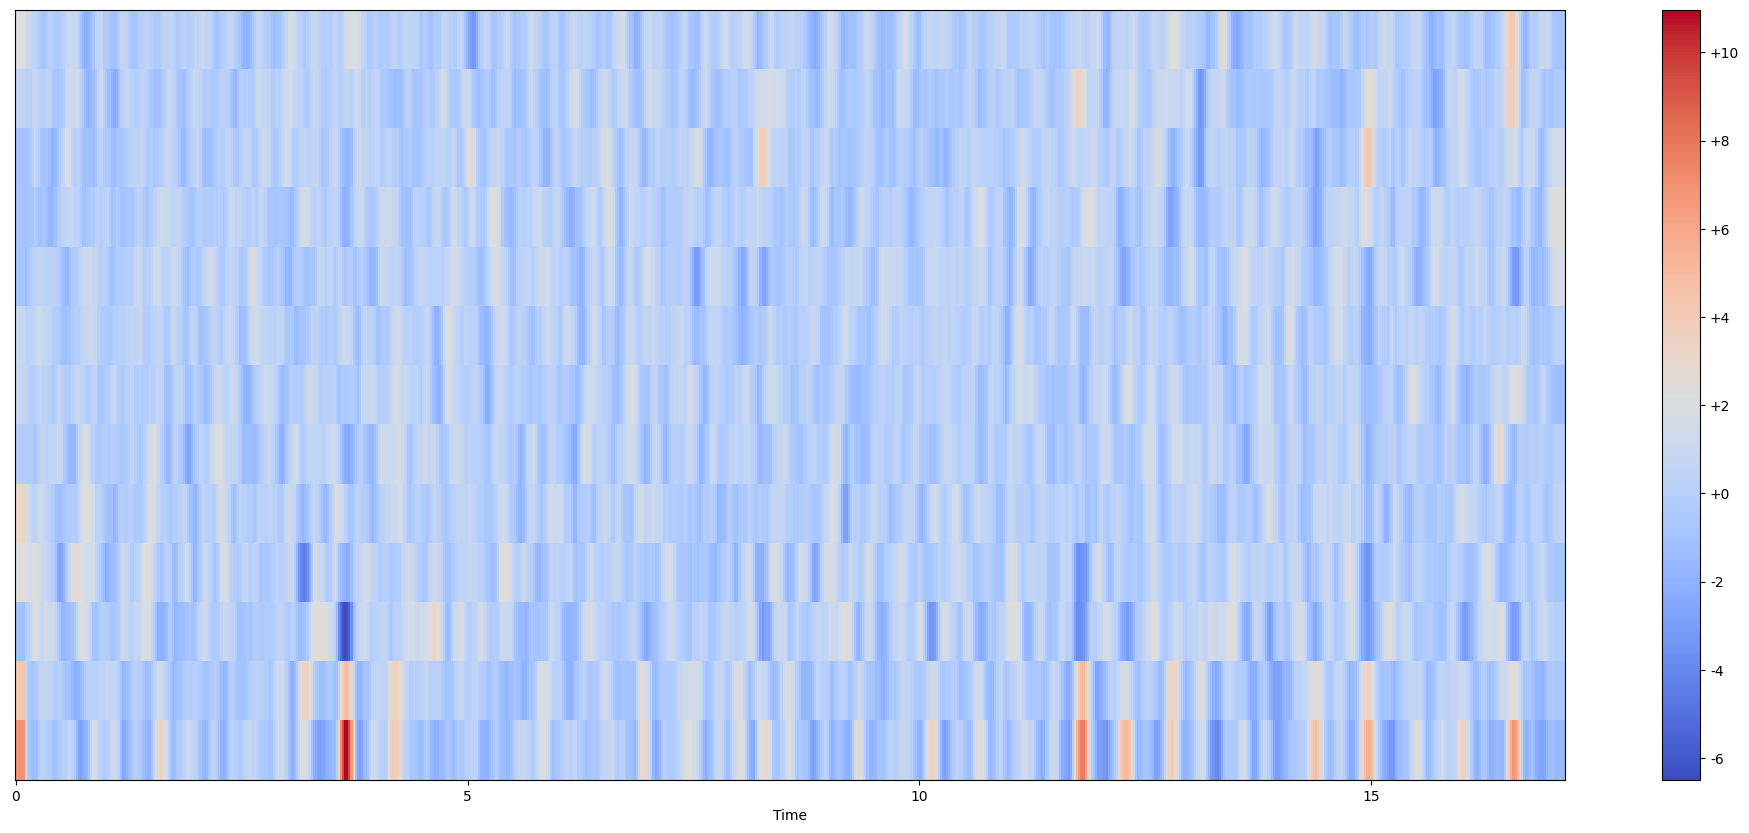

In [26]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

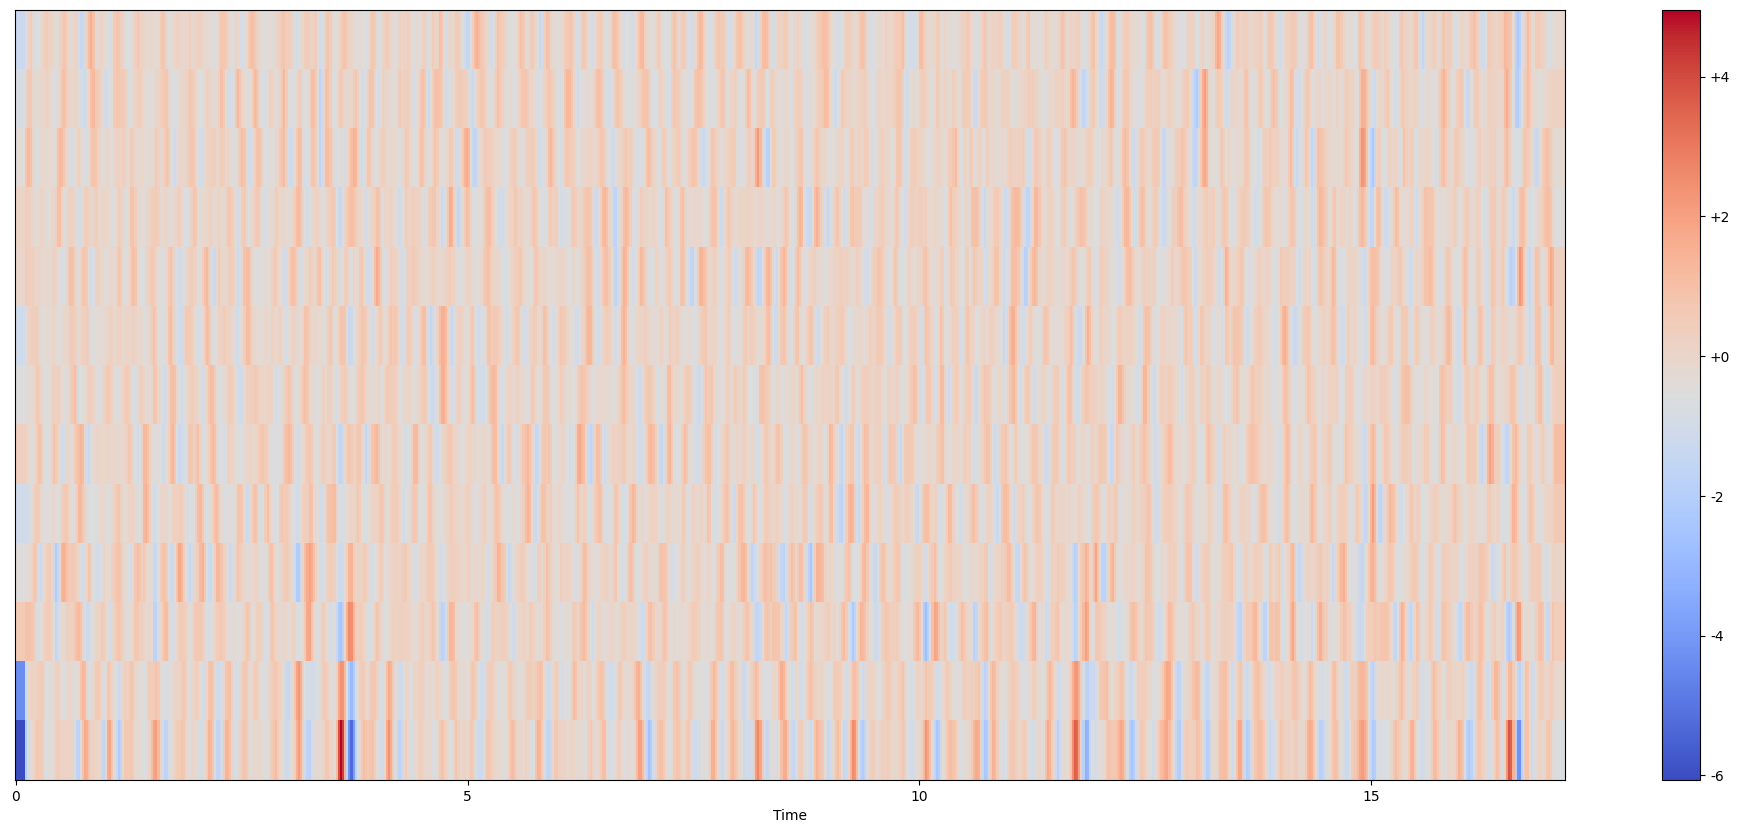

In [27]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show

In [32]:
#combining first and second derivatives for a unique audio signal
comp_mfccs = np.concatenate((mfccs,delta_mfccs,delta2_mfccs))

<function matplotlib.pyplot.show(close=None, block=None)>

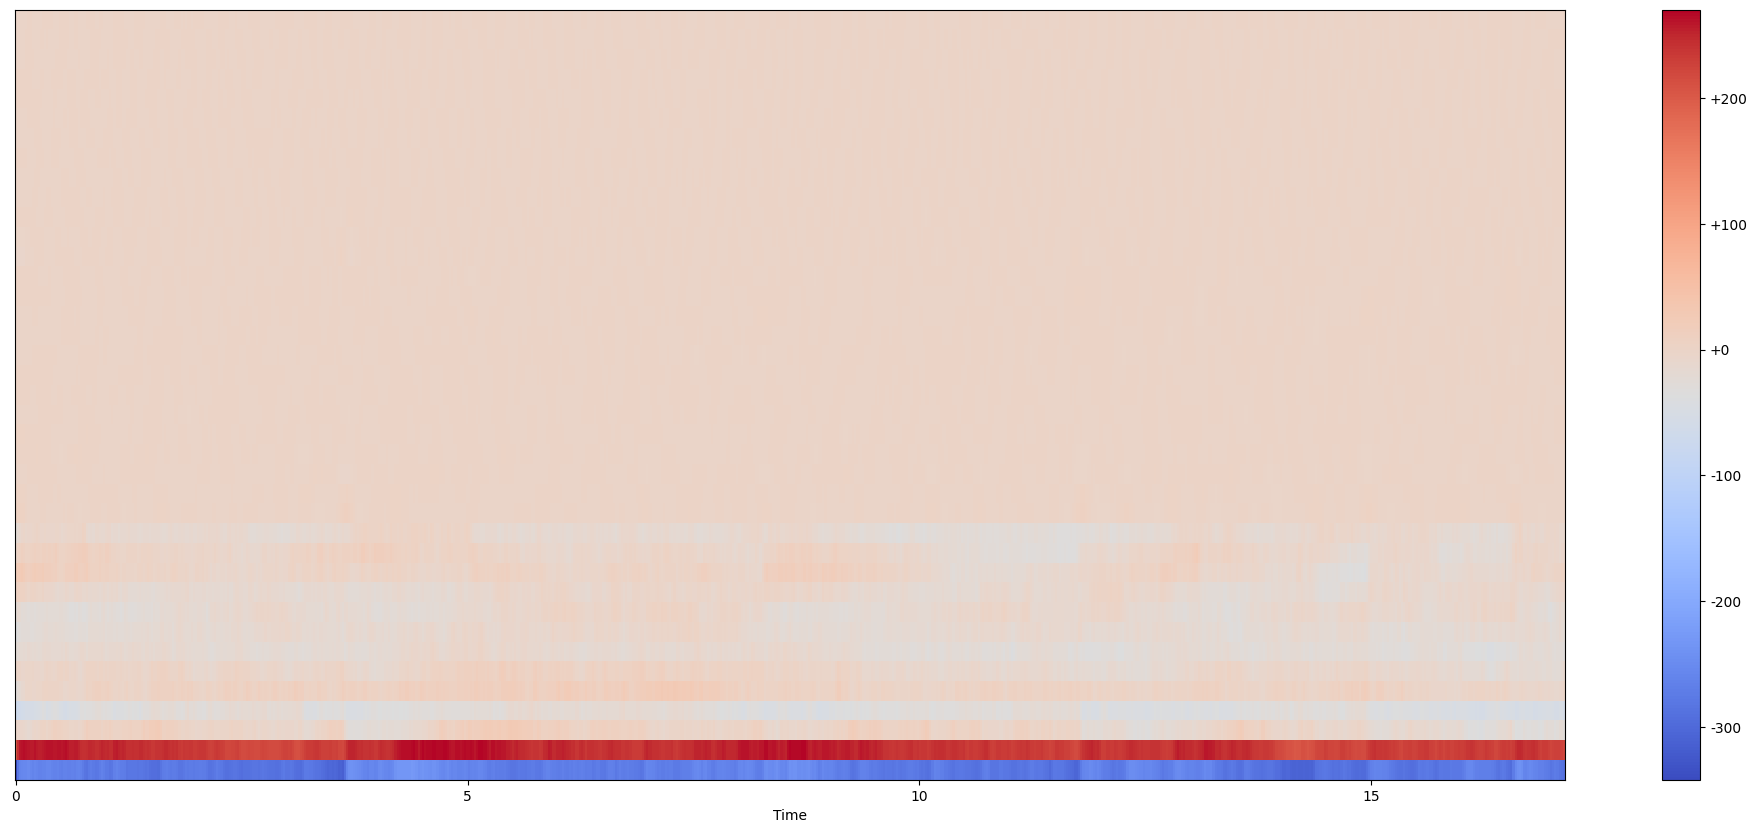

In [33]:
plt.figure(figsize=(25,10))
librosa.display.specshow(comp_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show